<a href="https://colab.research.google.com/github/ucchol/docker/blob/main/Data_Mining_SWA_EWMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
airline = pd.read_csv('airline_passengers.csv',\
                     index_col='Month', parse_dates=True)
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [6]:
airline.dropna(inplace=True)

In [7]:
airline['SMA6']=airline['Thousands of Passengers'].\
    rolling(window=6).mean()

airline['SMA12']=airline['Thousands of Passengers'].\
    rolling(window=12).mean()

In [8]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  144 non-null    int64  
 1   SMA6                     139 non-null    float64
 2   SMA12                    133 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.5 KB


In [9]:
airline

,Thousands of Passengers,SMA6,SMA12
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
...,...,...,...
1960-08-01,606,519.166667,463.333333
1960-09-01,508,534.000000,467.083333
1960-10-01,461,534.000000,471.583333


In [10]:
airline.dropna(inplace=True) #removing null values
airline

,Thousands of Passengers,SMA6,SMA12
Month,,,
1949-12-01,118,128.833333,126.666667
1950-01-01,115,123.333333,126.916667
1950-02-01,126,119.666667,127.583333
1950-03-01,141,120.500000,128.333333
1950-04-01,135,123.166667,128.833333
...,...,...,...
1960-08-01,606,519.166667,463.333333
1960-09-01,508,534.000000,467.083333
1960-10-01,461,534.000000,471.583333


In [11]:
airline.head(20)

,Thousands of Passengers,SMA6,SMA12
Month,,,
1949-12-01,118,128.833333,126.666667
1950-01-01,115,123.333333,126.916667
1950-02-01,126,119.666667,127.583333
1950-03-01,141,120.500000,128.333333
1950-04-01,135,123.166667,128.833333
1950-05-01,125,126.666667,129.166667
1950-06-01,149,131.833333,130.333333
1950-07-01,170,141.000000,132.166667
1950-08-01,170,148.333333,134.000000


<Axes: xlabel='Month'>

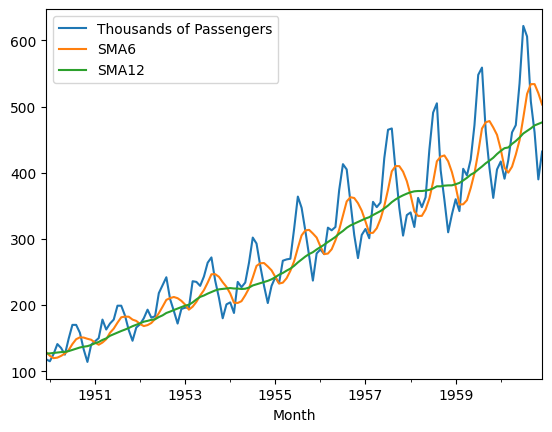

In [12]:
airline.plot()

In [13]:
airline['EWMA12']=airline['Thousands of Passengers'].\
    ewm(span=12, adjust=False).mean()

In [14]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 1949-12-01 to 1960-12-01
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  133 non-null    int64  
 1   SMA6                     133 non-null    float64
 2   SMA12                    133 non-null    float64
 3   EWMA12                   133 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 5.2 KB


In [15]:
airline

,Thousands of Passengers,SMA6,SMA12,EWMA12
Month,,,,
1949-12-01,118,128.833333,126.666667,118.000000
1950-01-01,115,123.333333,126.916667,117.538462
1950-02-01,126,119.666667,127.583333,118.840237
1950-03-01,141,120.500000,128.333333,122.249431
1950-04-01,135,123.166667,128.833333,124.211057
...,...,...,...,...
1960-08-01,606,519.166667,463.333333,494.898619
1960-09-01,508,534.000000,467.083333,496.914216
1960-10-01,461,534.000000,471.583333,491.388952


<Axes: xlabel='Month'>

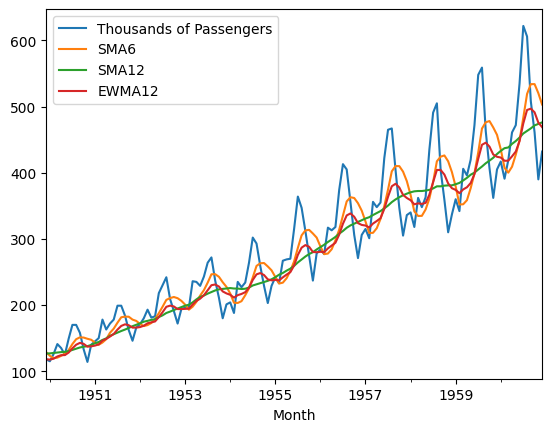

In [16]:
airline.plot()